<a href="https://colab.research.google.com/github/echou024/PCAForDimensionalityReduction/blob/main/PCAForDimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview
In this program, we will implement and test K-means algorithm for clustering and principal component analysis (PCA) for dimensionality reduction. We use K-means to perform segmentation/quantization on a color image. We will compute the PCA for a simple data set using SVD, then visualize the PCA for images.

We will use a dataset of cropped face images called LFW ("Labeled Faces in the Wild"). This face dataset was taken from news articles about 10 years ago. The full data set has thousands of faces, but we will use a small subset here. Since this data set is widely-used, it is installed as part of the sklearn.






In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# make sure you import here everything else you may need

## K-means clustering implementation:

Let us first implement K-means algorithm that accepts target number of clusters (K) and data vectors $\mathbf{x}_1,\ldots, \mathbf{x}_N$, each of length $d$. At this point, we will implement the K-means algorithm for general $d$; later we will test and visualize the results for $d=2,3$.

A general K-means algorithm can be described as follows.
Suppose we are given training examples $\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_N$, where each $\mathbf{x}_i \in \mathbb{R}^d$. We want to group the $N$ data samples into K clusters.  
* Initialize cluster centers $\mu_1,\ldots, \mu_K \in \mathbb{R}^d$ at random
* Repeat until convergence
  * For every data point $\mathbf{x}_i$, update its label as
  \begin{equation*}
  z_i = \text{argmin}_j \|\mathbf{x}_i - \mu_j\|_2^2.
  \end{equation*}
  
  * For each cluster $j$, update its center $\mu_j$ as mean of all points assigned to cluster $j$:
  $$ \mu_j = \dfrac{\sum_{i=1}^N \delta\{z_i = j\} \mathbf{x}_i}{\sum_{i=1}^N \delta \{z_i = j\}}.$$  
  $\delta\{z_i = j\}$ denotes an indicator function that is equal to 1 if $z_i = j$ and zero otherwise. $\sum_{i=1}^N\delta\{z_i = j\}$ indicates the number of points in $i$th cluster.

We can define sum of squared errors (SSE) as
$$ \text{SSE}  = \sum_j \sum_i \delta\{z_i = j\} \|\mathbf{x}_i - \mu_j\|_2^2$$`

In [ ]:
# TODO
# K-means clustering
def kmeans_clustering(data, K, max_iter=100, tol = pow(10,-3)):
  # Inputs
  #   data - N x d array
  #   K - number of clusters
  #   max_iter - maximum iterations for K-means
  #   tol - stopping parameter that checks relative change in sum of squared errors
  #
  # Outputs:
  #   labels - cluster assignment label for each data sample (N values)
  #   centroid - centroids of each cluster (K vectors)
  #   SSE_history - table of SSE record at every iteration
  #   iter - total number of iterations at stopping/convergence

  # TODO
  # Write your function for K-means clustering

  N, d = data.shape
  centroids = data[np.random.choice(N, K, replace=False)]
  labels = np.zeros(N, dtype=int)
  SSE_history = []

  for iter in range(max_iter):
    for i in range(N):
      #For every data point  𝐱𝑖 , update its label as 𝑧𝑖=argmin𝑗‖𝐱𝑖−𝜇𝑗‖22
      distances = np.linalg.norm(data[i] - centroids, axis=1)
      labels[i] = np.argmin(distances)

    # For each cluster  𝑗 , update its center  𝜇_𝑗  as mean of all points assigned to cluster  𝑗 :
    # updateCentroids = np.array([data[labels == k].mean(axis=0) for k in range(K)])
    updateCentroids = np.array([data[labels == k].mean(axis=0) if np.any(labels == k) else data[np.random.choice(N)] for k in range(K)])


    SSE = sum(np.linalg.norm(data[labels == k] - updateCentroids[k])**2 for k in range(K))


    SSE_history.append(SSE)

    if iter > 0 and np.absolute(SSE_history[iter] - SSE_history[iter-1]) / SSE_history[iter-1] <= tol:
      break

    centroids = updateCentroids


  return labels, centroids, SSE_history, iter

### Test K-means on simulated data with different values of K:

Let us create synthetic data with `num_clusters` clusters in 2-dimensional space and apply K-means clustering.



(-13.232027394771677,
 13.871361924952618,
 -20.109856225568763,
 14.784451565045881)

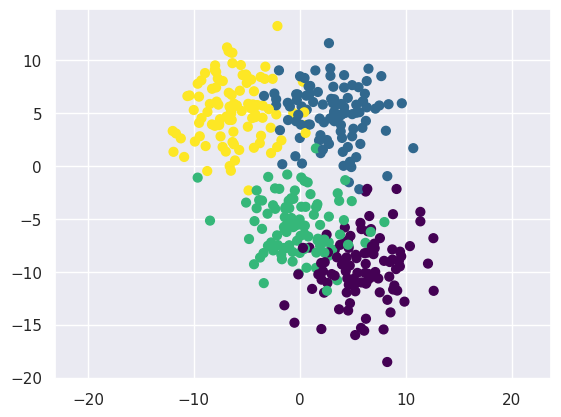

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.datasets import make_blobs

num_clusters = 4
X, y_true = make_blobs(n_samples=400,centers=num_clusters,cluster_std=3,random_state=10)

plt.scatter(X[:, 0], X[:, 1], c=y_true, s=40, cmap='viridis')
ax = plt.gca()
ax.axis('equal')

Let us now run K-means using different values of K.

Try `K = [num_clusters-1, num_clusters, num_clusters+1]`

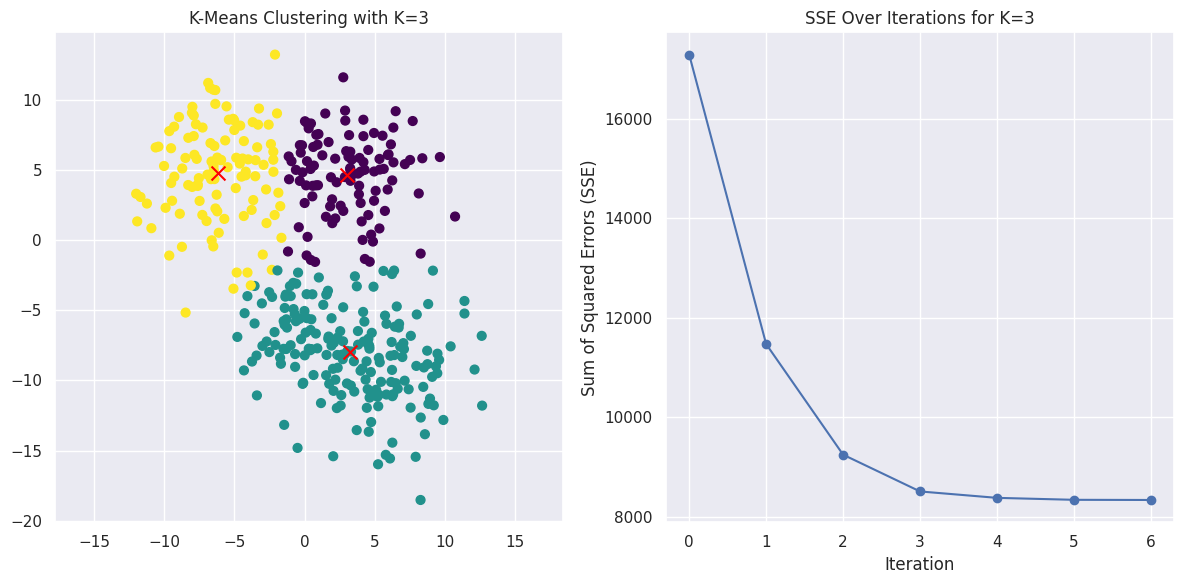

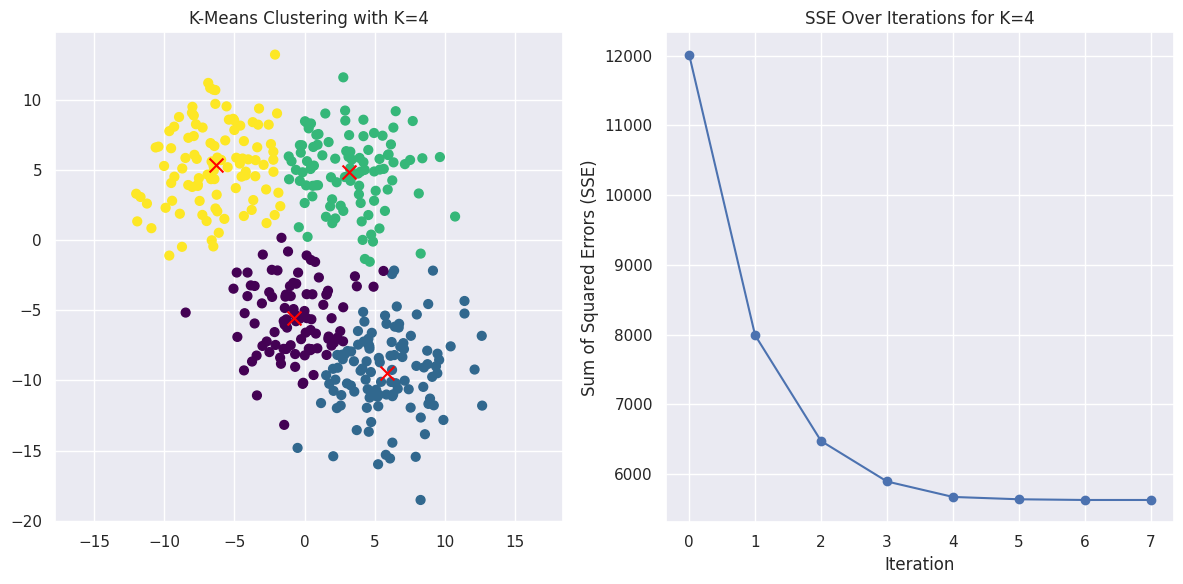

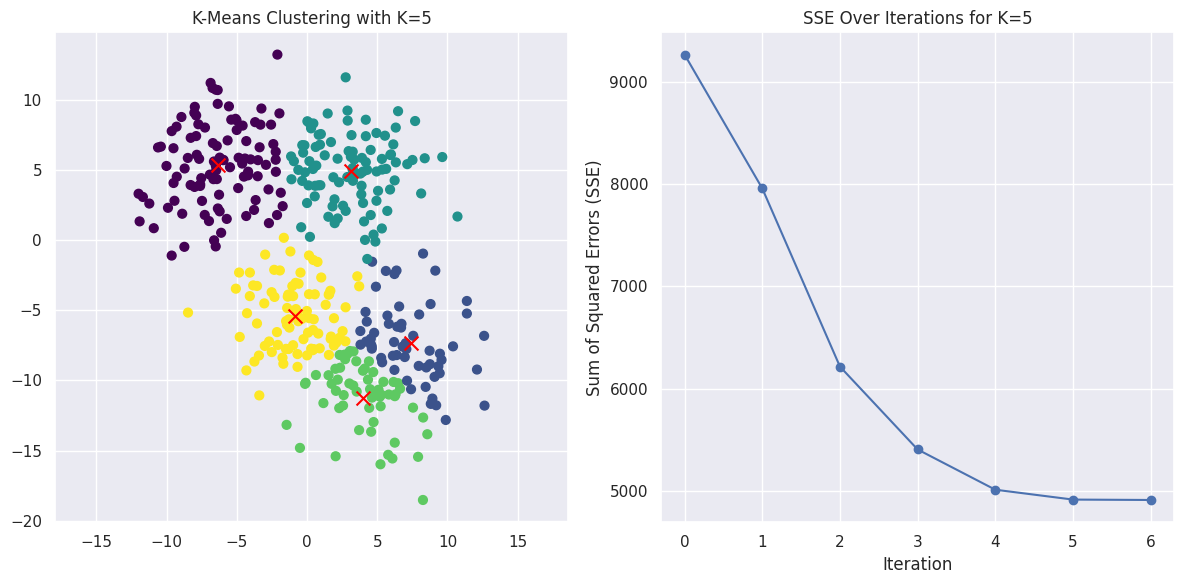

In [ ]:
# TODO
# Run K-means for different values of K.

for K in [num_clusters-1,num_clusters,num_clusters+1]:
  labels, centroids, SSE_history, iters = kmeans_clustering(X,K)

  # TODO
  # plot your data (one color per cluster)
  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 1)
  plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
  plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='x') # Centroids
  plt.title(f"K-Means Clustering with K={K}")
  plt.axis('equal')

  # TODO
  # plot SSE over different iterations
  plt.subplot(1, 2, 2)
  plt.plot(range(iters+1), SSE_history, marker='o')
  plt.title(f"SSE Over Iterations for K={K}")
  plt.xlabel("Iteration")
  plt.ylabel("Sum of Squared Errors (SSE)")

  plt.tight_layout()
  plt.show()


### OBSERVATIONS:

- The SSE decreases with each iteration of K-means algorithm.

- The SSE decreases as the K increases.
- Increasing the cluster_std of blobs above to cluster_std=5 will spread out the data points in each cluster more, making the clusters less distinct and more overlapping. This would be a less accurate model with higher SSE values.

### Color segmentation/quantization:
Now we will use K-means to perform segmentation/quantization on a color image.

Each pixel in a given image will be a feature vector containing 3 color components (RGB). We will first group all colors into K clusters, which will provide us a color palatte. Then we will replace the color in every pixel with one of the colors in the color palatte (that is the centroid of the cluster in which RGB value of a pixel falls).

We will use K-means script from previous step to segment the image into K clusters. To create a "quantized" output image, we replace every pixel in the image with the center of the cluster assigned to it.

uint8
(2208, 1242, 3)


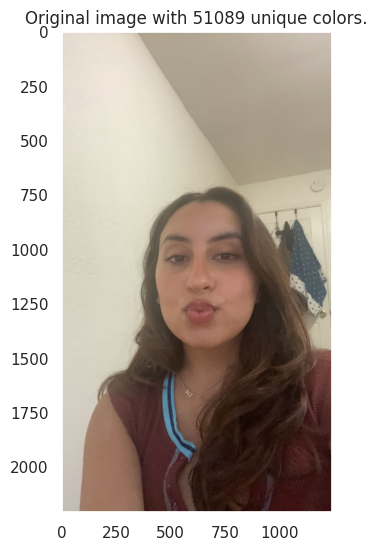

In [ ]:
# load and display an image with Matplotlib
from matplotlib import image

# load image as pixel array
img = image.imread('selfie.jpg')
# summarize shape of the pixel array
print(img.dtype)
print(img.shape)

# You can debug your code using some other image,
# but you must use your selfie for final results
# from sklearn.datasets import load_sample_image
# # load the picture
# img = load_sample_image('china.jpg')

h, w, c = img.shape
unique_colors = np.unique(np.reshape(img,(h*w,c)),axis = 0)

plt.figure()
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.grid(False)
plt.title('Original image with {0:d} unique colors.'.format(unique_colors.shape[0]))
plt.imshow(img)
plt.show()


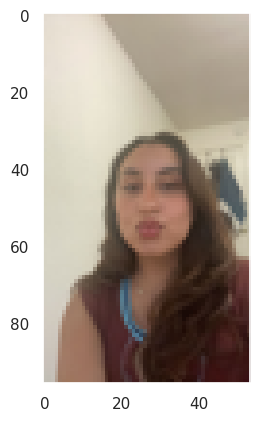

In [ ]:
# Resize image to speed things up

# Improting Image class from PIL module
from PIL import Image

# use resize function if needed

# TODO (if necessary)

img = Image.open('selfie.jpg')
img_size = img.size

# modify the size
new_size = np.asarray(img_size)/23
img = img.resize(new_size.astype(int))
img = np.asarray(img)
plt.imshow(img)
plt.grid(False)

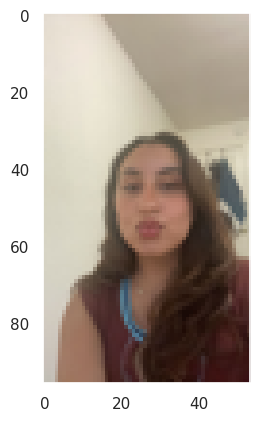

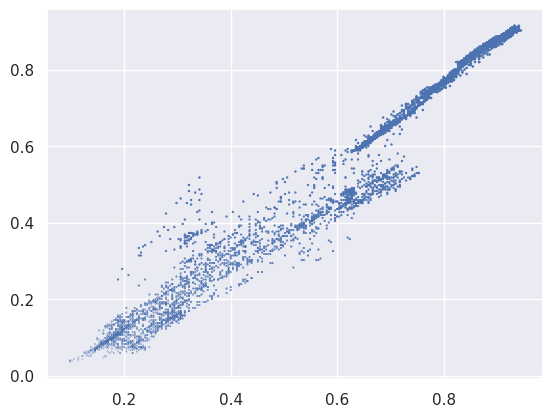

In [ ]:
# Preprocessing the data for clustering
# convert to float64 in range [0,1]
if np.max(img) > 1:
  img = np.array(img, dtype=np.float64) / 255
plt.imshow(img)
plt.grid(False)

# Load Image and transform to a 2D numpy array.
h, w, c = original_shape = tuple(img.shape)
assert c == 3
data = np.reshape(img, (w * h, c))

plt.figure()
plt.scatter(data[:,0],data[:,1],data[:,2])

Now we will perform two steps.

1. K-means clustering for different values of K using the `kmeans_clustering` function above.

2. Replace all the colors in the original image with the centroids of the cluster each of them belong to. This will give us a "segmented/quantized image" for different values of K; let us denote each image as `img_seg`.

Plot the original image and the `img_seg` for `K = 2, 4, 8, 16, 32, 64.`

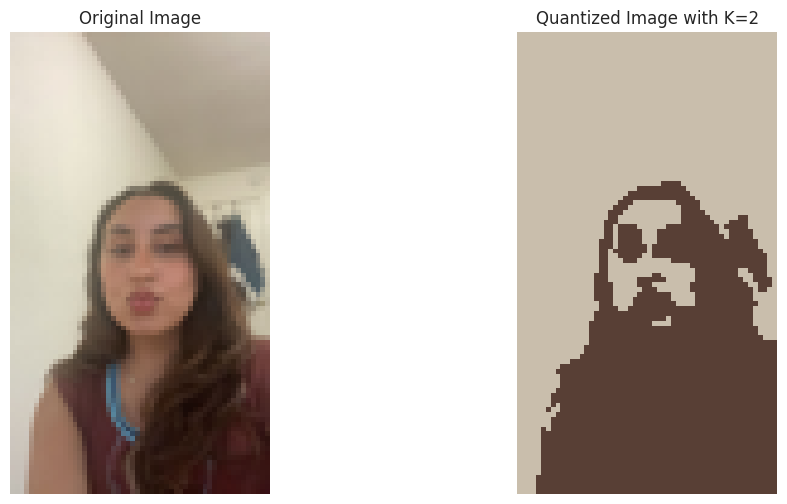

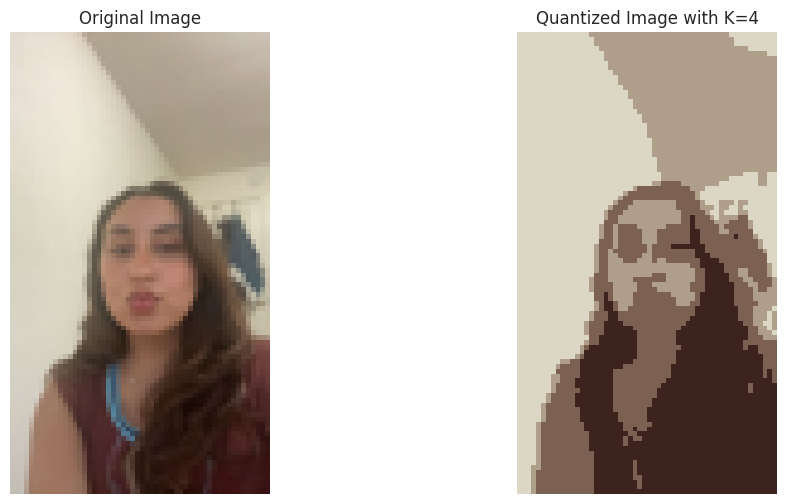

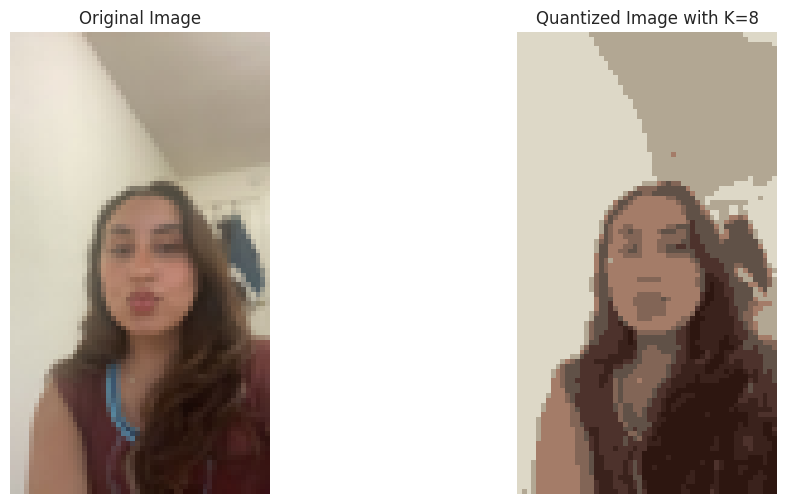

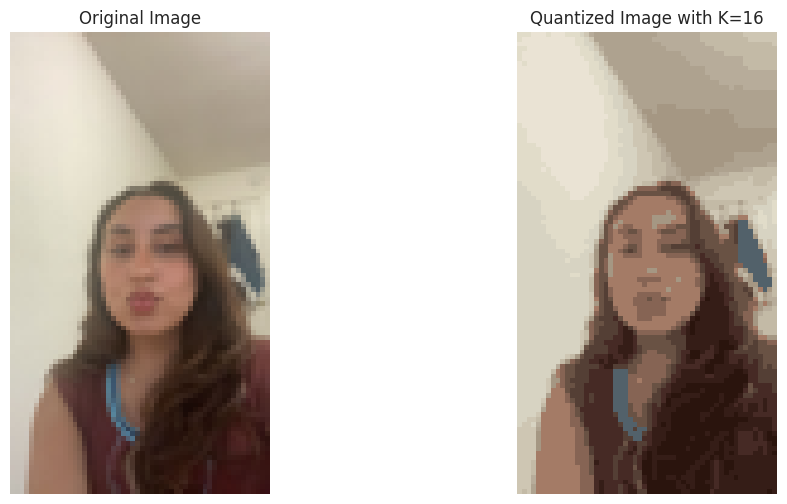

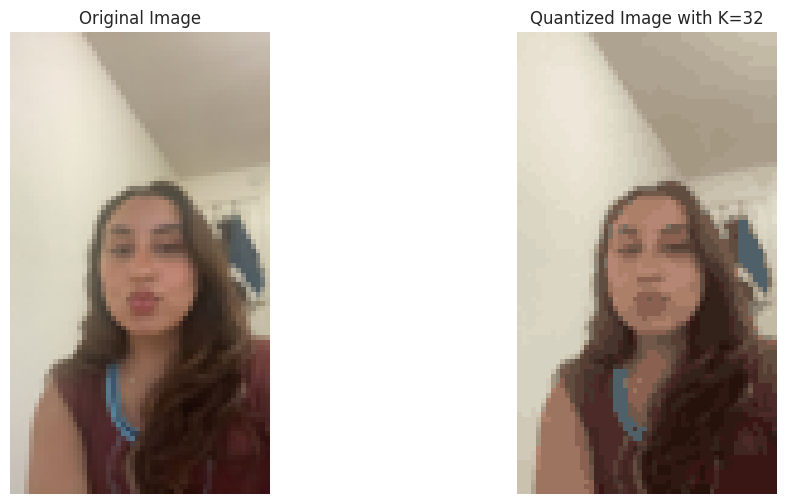

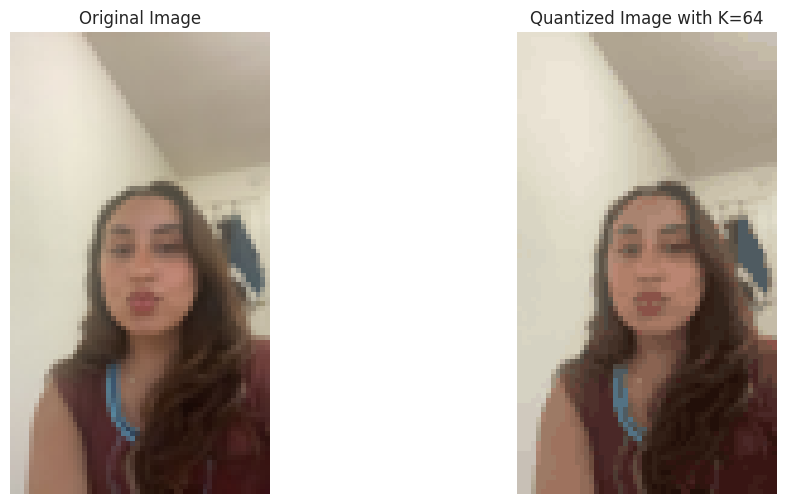

In [ ]:
# TODO
# For K = 2, 4, 8, 16, 32, 64
  # Perform K-means clustering for different values of K on RGB pixels;
  # this will give you K RGB values as centroids of K clusters

  # Create a quantized image based on your cluster assignment
  # Plot original and quantized images


for K in [2, 4, 8, 16, 32, 64]:
  labels, centroids, SSE_history, iters = kmeans_clustering(data,K,max_iter=100,tol=pow(10,-3))

  # Replace each pixel's value with its centroid's value
  quantized_img = np.zeros_like(data)
  for i in range(K):
      quantized_img[labels == i] = centroids[i]

  # Reshape to the original image shape
  quantized_img = quantized_img.reshape(original_shape)

  # Plot the original and quantized images
  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 1)
  plt.imshow(img)
  plt.title('Original Image')
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.imshow(quantized_img)
  plt.title(f'Quantized Image with K={K}')
  plt.axis('off')

  plt.show()



### OBSERVATIONS:


- There are 2 unique colors in the quantized image for K=2.

- The quality of "quantized image" gets better as you increase K.

- K=64 provides me with the best quality. for the "quantii

## Eigen Faces via Principal Component Analysis:

In this question, we will

- Compute the PCA for a simple data set using SVD.
- Visualize the PCA for images


__Load dataset__

We will use a dataset of cropped face images called LFW ("Labeled Faces in the Wild").

This face dataset was taken from news articles about 10 years ago.  The full data set has thousands of faces, but we will use a small subset here.  Since this data set is widely-used, it is installed as part of the `sklearn`.


In [ ]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

Once the data is loaded, we can get see the dimensions

In [ ]:
# Get images
n_samples, h, w = lfw_people.images.shape
npix = h*w

# Data in 2D form
X = np.transpose(lfw_people.data)

# NOTE: In many of the libraries the data is stored as N x d array,
# where N is the number of training samples and d is the length of each data vector
# Since we use a different notation in the class, I will stick with that.

# Data array has dimensions 1850 x 1288 -- (pixels) x (faces)
# Each data vector is stored as a column in the matrix.

# Labels of images
y = lfw_people.target
target_names = lfw_people.target_names

print("Image size     = {0:d} x {1:d} = {2:d} pixels".format(h,w,npix))
print("Number faces   = {0:d}".format(n_samples))

Image size     = 50 x 37 = 1850 pixels
Number faces   = 1288


__Plotting the Faces__

We will plot a few faces to look at the dataset.

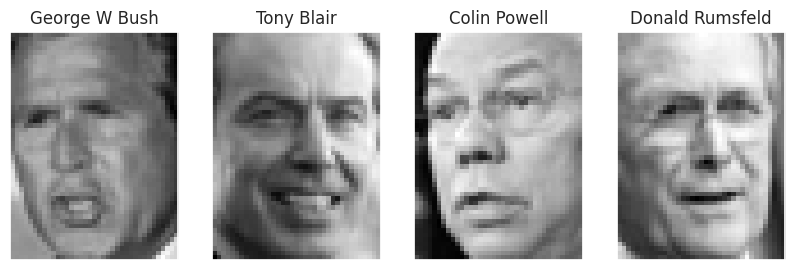

In [ ]:
def plt_face(x):
    h = 50
    w = 37
    plt.imshow(x.reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])

I = np.random.permutation(n_samples)
plt.figure(figsize=(10,20))

T = 4
for i in range(T):
    ind = I[i]
    plt.subplot(1,T,i+1)
    plt_face(X[:,ind])
    plt.title(target_names[y[ind]])

### Computing the PCA via SVD
To compute principal components (PCs), you will perform two steps.

1. Subtract the mean from the data set.
2. Compute the singular value decomposition (SVD)

Suppose $X$ is the $D\times N$ data matrix. ($D$ is the number of pixels in each image, $N$ is the number of images.)

We will first remove mean column from all the columns (because data vectors are stored as columns).

``` Xs = X - np.mean(X,1,keepdims = True) ```

Then we will compute an SVD of mean-substracted data as

``` U_, S_, Vt_ = np.linalg.svd(Xs, full_matrices=False)```

Note that in python the SVD returns a list of singular values and `V.T` instead of `V`.
The `full_matrices` option gives the *economy* SVD


In [ ]:
# Compute SVD

# subtract mean from the dataset
# since data vectors are stored as columns, the mean of columns should be zero

npix = h*w
Xmean = np.mean(X,1,keepdims=True)
Xs = X - Xmean

U_,S_,Vt_ = np.linalg.svd(Xs, full_matrices=False)

Text(0.5, 0, 'index')

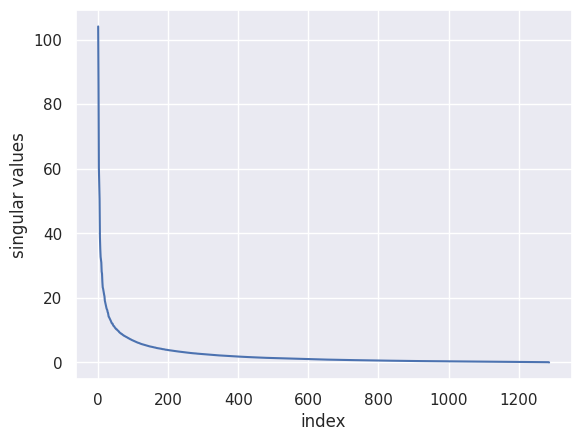

In [ ]:
# We can plot the singular values

plt.figure()
plt.plot(S_)
plt.ylabel('singular values')
plt.xlabel('index')

Next we will approximate the data using $r$ principal components/factors as

    X ~= Xhat = Xmean + U.dot(Z)
    
The terms

*  `U` are the top-$r$ principal components/factors from `U_` computed from data.
*  `Z` are the coefficients of data samples (or projections onto principal components). Note that we can compute $Z = U^T X$.  

For instance, we can compute $Z$ for $r = 20$ and the approximate data as

In [ ]:
# Compute Z for r = 20
N = X.shape[1]
Z = U_.T.dot(Xs)

r = 20
Xest = Xmean + U_[:,:r].dot(Z[:r,:])

[ 587  900 1239]
Approximated faces (above)


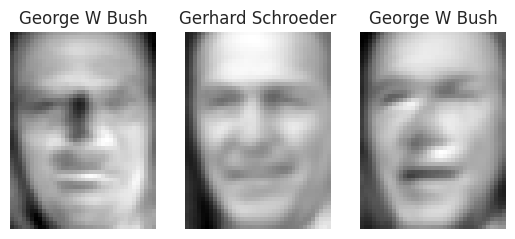

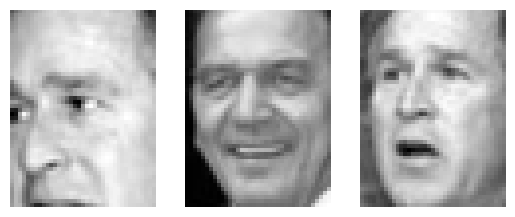

Original faces (below)


<Figure size 640x480 with 0 Axes>

In [ ]:
# plot some sample images
T = 3;
inds = np.random.permutation(n_samples)
inds = inds[:T]
print(inds)

# plot approximated faces
print('Approximated faces (above)')
for i in range(T):
  plt.subplot(1,T,i+1)
  plt_face(Xest[:,inds[i]])
  plt.grid(False)
  plt.axis('off')
  plt.title(target_names[y[inds[i]]])
  if i == 0:
    plt.ylabel('Approximation')

plt.show()

# plot original faces
for i in range(T):
  plt.subplot(1,T,i+1)
  plt_face(X[:,inds[i]])
  plt.grid(False)
  plt.axis('off')
  if i == 0:
    plt.ylabel('Original')

plt.show()
plt.tight_layout()

print('Original faces (below)')

### Plotting Approximated Images from PCs:

We will now plot the images approximated using different values of $r$.

Selecting 3 images at random from the dataset and find its approximation using top  $r$ factors for $r = \{0, 5, 10, 50, 100, 200\}$.

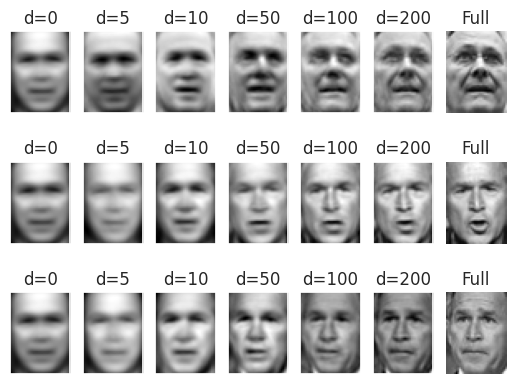

In [ ]:
# TODO
  # select 3 images
  # select r = [0, 5, 10, 50, 100, 200]
  # find approximation of selected images and plot them

T = 3                             # number of faces to plot
r_list = [0, 5,10,50,100, 200]    # number of SVD approximations
nr = len(r_list)

# TODO
# Select 3 random faces
inds = np.random.permutation(n_samples)
inds = inds[:T]

# TODO
# Loop over figures
# compute approximation with r factors
iplt = 0
for ind in inds:
    for r in r_list:
        plt.subplot(T,nr+1,iplt+1)

        # Reconstruct with SVD
        # TODO
        Xest = Xmean + U_[:,:r].dot(Z[:r,:])
        Xhati = Xest[:,ind]  # estimate of image in the r-dim subspace

        plt_face(Xhati)
        plt.title('d={0:d}'.format(r))
        iplt += 1

    # Plot the true face
    plt.subplot(T,nr+1,iplt+1)
    plt_face(X[:,ind])
    plt.axis('off')
    plt.title('Full')
    iplt += 1

Finally, we pick 10 top PCs and plot them as images.

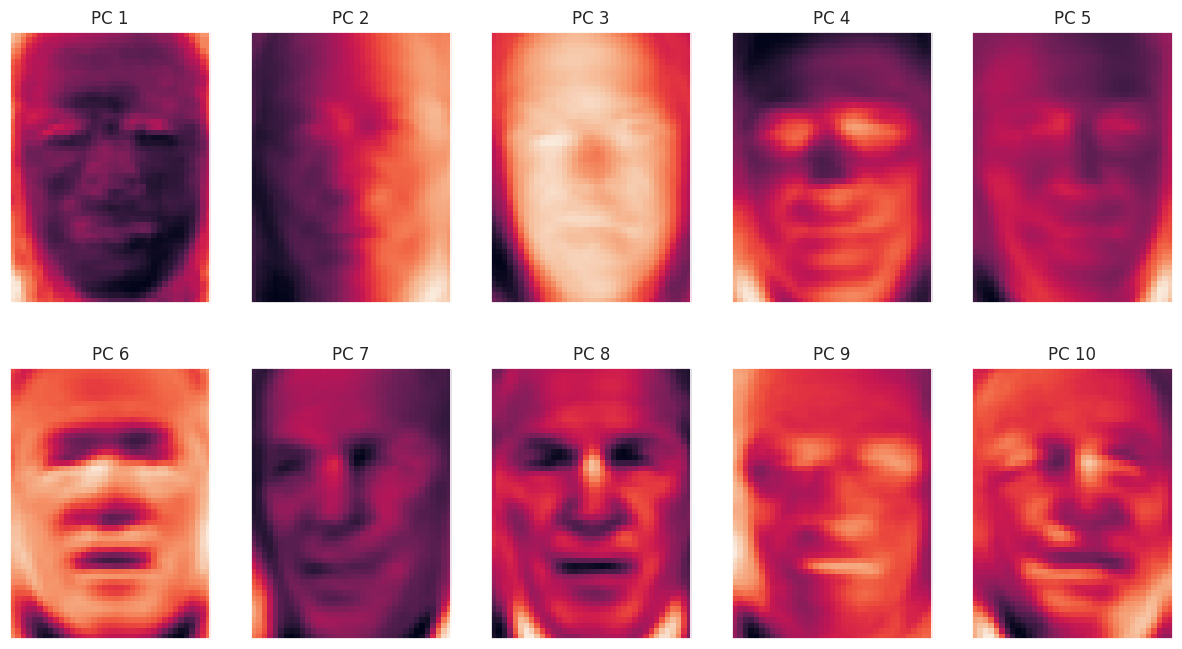

In [ ]:
# TODO
  # Plot first 10 PCs (i.e., columns in U_) as images
num_pcs = 10

plt.figure(figsize=(15, 8))
for i in range(num_pcs):
    pc = U_[:, i].reshape(h, w)

    plt.subplot(2, 5, i + 1)
    plt.imshow(pc)
    plt.title(f'PC {i+1}')
    plt.xticks([])
    plt.yticks([])

plt.show()


### Best and Worst Approximation:

The $\ell_2$ norm of the approximation error of any data vector is same as the $\ell_2$ norm of the unused coefficients.

Using this property, we find the best and worst 5 images in the dataset that give smallest and largest error in approximation with top 200 PCs?

Text(0, 0.5, 'Z residual')

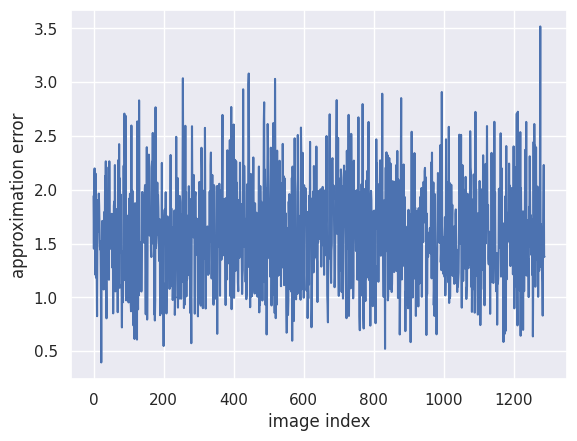

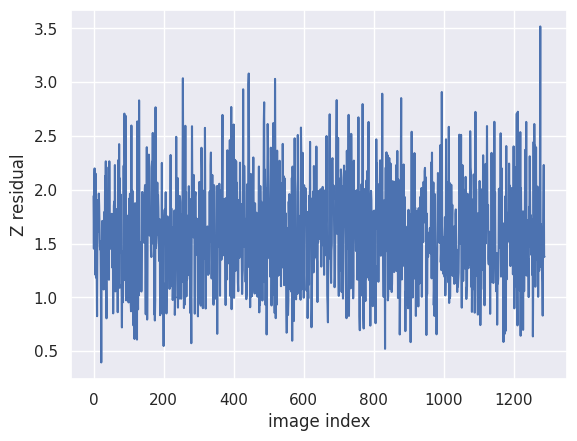

In [ ]:
# We can compute the L2 norm of the approximation error for each image as
# the L2 norm of the unused coefficients

r = 200
Xest = Xmean + U_[:,:r].dot(Z[:r,:])

est_error = np.sum(pow(Xest-X,2),axis=0)
plt.figure()
plt.plot(est_error)
plt.xlabel('image index')
plt.ylabel('approximation error')


Z_residual = np.sum(pow(Z[r:,:],2),axis=0)
plt.figure()
plt.plot(Z_residual)
plt.xlabel('image index')
plt.ylabel('Z residual')


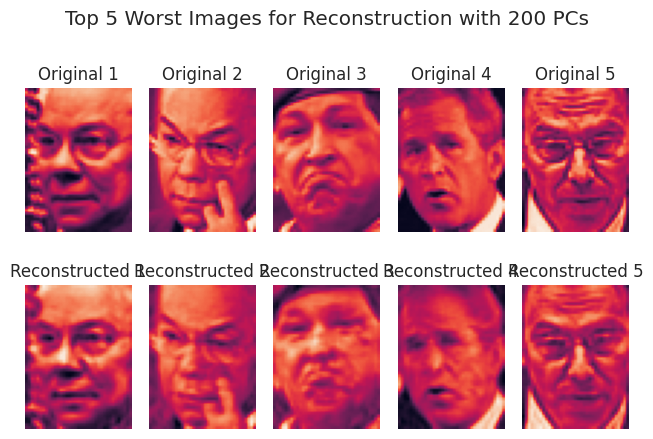

In [ ]:
# TODO
# Plot the "Worst/Hardest" images to reconstruct with 200 PCs

# Sort error/residual in decreasing order and pick top 5 indices

# your code goes here

# Sort error and pick top 5
worst_indices = np.argsort(est_error)[::-1][:5]

# Plot
for i in range(5):
    idx = worst_indices[i]  # Index of the current worst image

    # Original image
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[:, idx].reshape(h, w))
    plt.title(f'Original {i+1}')
    plt.axis('off')

    # Reconstructed image
    plt.subplot(2, 5, i + 6)
    plt.imshow(Xest[:, idx].reshape(h, w))
    plt.title(f'Reconstructed {i+1}')
    plt.axis('off')

plt.suptitle('Top 5 Worst Images for Reconstruction with 200 PCs')
plt.tight_layout()
plt.show()


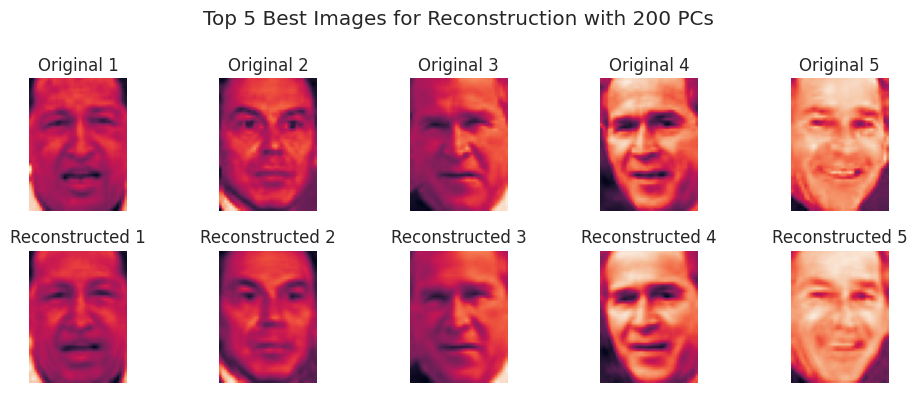

In [ ]:
# TODO
# Plot the "Best/Easiest" images to reconstruct with 200 PCs

# Sort error/residual in increasing order and pick top 5 indices

# your code goes here

best_indices = np.argsort(est_error)[:5]

plt.figure(figsize=(10, 4))

for i in range(5):
    idx = best_indices[i]

    # Original image
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[:, idx].reshape(h, w))
    plt.title(f'Original {i+1}')
    plt.axis('off')

    # Reconstructed image
    plt.subplot(2, 5, i + 6)
    plt.imshow(Xest[:, idx].reshape(h, w))
    plt.title(f'Reconstructed {i+1}')
    plt.axis('off')

plt.suptitle('Top 5 Best Images for Reconstruction with 200 PCs')
plt.tight_layout()
plt.show()

